In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def hmc( U, gradU, m, dt, nstep, x, mhtest ):
    
    p = np.random.randn(1) * np.sqrt(m)
    oldX = x
    oldEnergy = p * p / (2*m) + U(x)
    
    #p = p - dt * gradU(x) / 2
    #for i in range(nstep):
    #    x = x + p * dt / m
    #    p = p - gradU(x) * dt
    #p = p - dt * gradU(x) / 2
    
    for i in range(nstep):
        p = p - dt * gradU(x) / 2
        x = x + p * dt / m
        p = p - dt * gradU(x) / 2
    
    if mhtest:
        newEnergy = p * p / (2*m) + U(x)
        u = np.random.uniform(size=1)
        if (u > np.exp(oldEnergy-newEnergy)):
            # reject
            x = oldX
    
    return x

In [3]:
def sghmc( U, gradU, m, dt, nstep, x, C, V ):
    '''
    '''
    
    B = 0.5 * V * dt
    D = np.sqrt( 2 * (C-B) * dt )
    
    p = np.random.randn(1) * np.sqrt(m)
    for i in range(nstep):
        x = x + dt * p / m
        p = p - dt * gradU(x) - dt * C * p/m - np.random.randn(1) * D
    
    return x

In [4]:
# data
nsample = 80000
xStep = 0.1
m = 1
dt = 0.1
nstep = 50
xGrid = np.arange(-3, 3.01, step=xStep)
C = 3
V = 4

np.random.seed(10)

# functions
U = lambda x: -2 * x**2 + x**4
gradUPerfect =  lambda x: - 4 * x +  4 * x**3
noise = 2*np.random.randn(1)
gradU = lambda x: -4 * x + 4 * x**3 + 2*np.random.randn(1)

In [5]:
## Standard HMC (with MH)

samples = np.zeros((nsample))
x = np.array([0])
for i in range(nsample):
    x = hmc( U, gradUPerfect, m, dt, nstep, x, 1)
    samples[i] = x

yhmc_1, xhmc_1 = np.histogram(samples, xGrid)
yhmc_1 = yhmc_1 / sum(yhmc_1) / xStep

In [6]:
## Standard HMC (no MH)

samples = np.zeros((nsample))
x = np.array([0])
for i in range(nsample):
    x = hmc( U, gradUPerfect, m, dt, nstep, x, 0)
    samples[i] = x

yhmc_2, xhmc_2 = np.histogram(samples, xGrid)
yhmc_2 = yhmc_2 / sum(yhmc_2) / xStep

In [7]:
## Naive stochastic gradient HMC (with MH)

samples = np.zeros((nsample))
x = np.array([0])
for i in range(nsample):
    x = hmc( U, gradU, m, dt, nstep, x, 1)
    samples[i] = x

yhmc_3, xhmc_3 = np.histogram(samples, xGrid)
yhmc_3 = yhmc_3 / sum(yhmc_3) / xStep

In [8]:
## Naive stochastic gradient HMC (no MH)

samples = np.zeros((nsample))
x = np.array([0])
for i in range(nsample):
    x = hmc( U, gradU, m, dt, nstep, x, 0)
    samples[i] = x

yhmc_4, xhmc_4 = np.histogram(samples, xGrid)
yhmc_4 = yhmc_4 / sum(yhmc_4) / xStep

In [9]:
## SGHMC

samples = np.zeros((nsample))
x = np.array([0])
for i in range(nsample):
    x = sghmc(U, gradU, m, dt, nstep, x, C, V )
    samples[i] = x

yhmc_5, xhmc_5 = np.histogram(samples, xGrid)
yhmc_5 = yhmc_5 / sum(yhmc_5) / xStep

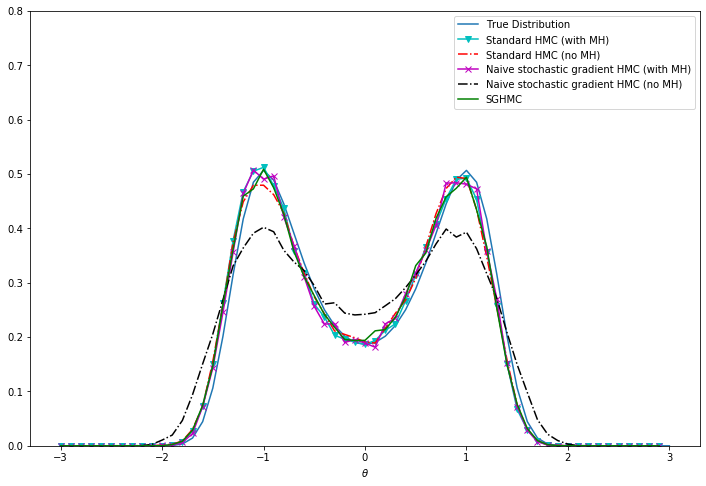

In [10]:
y = np.exp( -U(xGrid) )
y = y / sum(y) / xStep

plt.figure(figsize = (12,8))
plt.plot(xGrid,y, label = 'True Distribution')
plt.plot(xhmc_1[:-1], yhmc_1, 'c-v', label = 'Standard HMC (with MH)')
plt.plot(xhmc_2[:-1], yhmc_2, 'r-.', label = 'Standard HMC (no MH)')
plt.plot(xhmc_3[:-1], yhmc_3, 'm-x', label = 'Naive stochastic gradient HMC (with MH)')
plt.plot(xhmc_4[:-1], yhmc_4, 'k-.', label = 'Naive stochastic gradient HMC (no MH)')
plt.plot(xhmc_5[:-1], yhmc_5, 'g', label = 'SGHMC')

plt.legend(loc = 1)
plt.ylim(0, 0.8)
plt.xlabel('$\\theta$');